# This notebook's function is to read in the data from the out_.xlsx files (which should all be in a consistent format) and generate an excel file from the data.

In [1]:
# import modules
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read in all of the out_.xlsx files, they can be read from column M of Vehicle_fleet_data 

In [2]:
# # read in data, set the header to be the desired column titles
# df = pd.read_excel('vehicle_fleet_stock.xlsx', sheet_name= 'data', index_col=[0],)
# df.index.name = 'id'
# df # view the data frame

In [3]:
# this should have the same result
df = pd.read_pickle('stock_df.pickle')

In [4]:
df[df.geo=='Japan']

,year_of_measurement,date_of_measurement,geo,process,vehicle_class,vehicle_segment,motor_energy,model_year,year_of_first_registraion,value,unit,source,accessed,notebook,footnote
003000000086,2005,,Japan,r,OICV,all,all,all,,18596000,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000000227,2006,,Japan,r,OICV,all,all,all,,1.8338e+07,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000000368,2007,,Japan,r,OICV,all,all,all,,1.8091e+07,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000000509,2008,,Japan,r,OICV,all,all,all,,1.7663e+07,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000000650,2009,,Japan,r,OICV,all,all,all,,1.7305e+07,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
002000000957,2011,,Japan,r,OIPC,all,all,all,,5.867e+07,nr,OICA,2020-06-24,oica_st_2005_2015_iu,
002000001102,2012,,Japan,r,OIPC,all,all,all,,5.9421e+07,nr,OICA,2020-06-24,oica_st_2005_2015_iu,
002000001247,2013,,Japan,r,OIPC,all,all,all,,6.00358e+07,nr,OICA,2020-06-24,oica_st_2005_2015_iu,
002000001392,2014,,Japan,r,OIPC,all,all,all,,6.06681e+07,nr,OICA,2020-06-24,oica_st_2005_2015_iu,


## Make a new dataframe focusing on just passenger cars as defined by my own definition 'PCMO'



In [5]:
# copy the dataframe to make a new object named p_c
df_p_or_c = df.copy()

In [6]:
df_p_or_c

,year_of_measurement,date_of_measurement,geo,process,vehicle_class,vehicle_segment,motor_energy,model_year,year_of_first_registraion,value,unit,source,accessed,notebook,footnote
003000000000,2005,,Austria,r,OICV,all,all,all,,367000,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000000001,2005,,Belgium,r,OICV,all,all,all,,674465,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000000002,2005,,Denmark,r,OICV,all,all,all,,479000,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000000003,2005,,Finland,r,OICV,all,all,all,,86690,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000000004,2005,,France,r,OICV,all,all,all,,6198000,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
004000003800,2018,,Sweden,r,EUM1,all,ICE,all,,212504,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000003801,2018,,United Kingdom of Great Britain and Northern I...,r,EUM1,all,ICE,all,,343,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,"definition differs, see eurostat metadata"
004000003803,2018,,Norway,r,EUM1,all,ICE,all,,1008,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000003804,2018,,Switzerland,r,EUM1,all,ICE,all,,3700,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN


In [16]:
#replace class codes with own PCMO approximation

metaxls = pd.ExcelFile('metadata_vehicle_fleet.xlsx')
classMetadata = pd.read_excel(metaxls, sheet_name= 'class_metadata', index_col= 0)

df_p_or_c['vehicle_class'].replace(to_replace=classMetadata.code.to_list(), value=classMetadata.PCMO.to_list(), inplace=True )

#find codes which did not match 
df_p_or_c[~df_p_or_c['vehicle_class'].isin(classMetadata.PCMO)]

,year_of_measurement,date_of_measurement,geo,process,vehicle_class,vehicle_segment,motor_energy,model_year,year_of_first_registraion,value,unit,source,accessed,notebook,footnote
003000000000,2005,2005-03-31,Europe,r,OICA,all,all,all,,45053.2,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000000001,2005,2005-03-31,Austria,r,OICA,all,all,all,,367,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000000002,2005,2005-03-31,Belgium,r,OICA,all,all,all,,674.465,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000000003,2005,2005-03-31,Denmark,r,OICA,all,all,all,,479,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000000004,2005,2005-03-31,Finland,r,OICA,all,all,all,,86.69,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
003000001587,2015,2015-03-31,Sudan,r,OICA,all,all,all,,61,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000001589,2015,2015-03-31,Togo,r,OICA,all,all,all,,58,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000001591,2015,2015-03-31,Uganda,r,OICA,all,all,all,,340,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,
003000001593,2015,2015-03-31,Zimbabwe,r,OICA,all,all,all,,110,nr,OICA,2020-06-30,003_s_GL_2005_2015_cl(cv)_oica.ipynb,


In [17]:
# make a datafram of just the passenger cars (according to *somewhat* arbitrary mapping)
p_df = df_p_or_c[(df_p_or_c.vehicle_class=='p')]
p_df

,year_of_measurement,date_of_measurement,geo,process,vehicle_class,vehicle_segment,motor_energy,model_year,year_of_first_registraion,value,unit,source,accessed,notebook,footnote
008000000000,2016,2016-12-31,Norway,r,p,all,ICE,all,,1196148,nr,STATBANK,2020-08-04,008_s_NO_2016_2019_cl_me_statbank.ipynb,hybrids in own motor energy category
008000000001,2017,2017-12-31,Norway,r,p,all,ICE,all,,1139998,nr,STATBANK,2020-08-04,008_s_NO_2016_2019_cl_me_statbank.ipynb,hybrids in own motor energy category
008000000002,2018,2018-12-31,Norway,r,p,all,ICE,all,,1075179,nr,STATBANK,2020-08-04,008_s_NO_2016_2019_cl_me_statbank.ipynb,hybrids in own motor energy category
008000000003,2019,2019-12-31,Norway,r,p,all,ICE,all,,1031207,nr,STATBANK,2020-08-04,008_s_NO_2016_2019_cl_me_statbank.ipynb,hybrids in own motor energy category
008000000004,2016,2016-12-31,Norway,r,p,all,ICE,all,,1276947,nr,STATBANK,2020-08-04,008_s_NO_2016_2019_cl_me_statbank.ipynb,hybrids in own motor energy category
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
004000003800,2018,,Sweden,r,p,all,ICE,all,,212504,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000003801,2018,,United Kingdom of Great Britain and Northern I...,r,p,all,ICE,all,,343,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,"definition differs, see eurostat metadata"
004000003803,2018,,Norway,r,p,all,ICE,all,,1008,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000003804,2018,,Switzerland,r,p,all,ICE,all,,3700,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN


### Compare the passenger car data from Eurostat and OICA

In [20]:
# get passenger cars for norway where all attributes are all and source is eurostat
p_norway_euro= p_df[(p_df.geo=='Norway') & (p_df.source=='EUROSTAT') & (p_df.motor_energy=='all') & (p_df.vehicle_segment=='all')]
p_norway_euro

,year_of_measurement,date_of_measurement,geo,process,vehicle_class,vehicle_segment,motor_energy,model_year,year_of_first_registraion,value,unit,source,accessed,notebook,footnote
004000000029,2012,,Norway,r,p,all,all,all,,2443000,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000000573,2013,,Norway,r,p,all,all,all,,2500265,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000001117,2014,,Norway,r,p,all,all,all,,2555443,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000001661,2015,,Norway,r,p,all,all,all,,2610000,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000002205,2016,,Norway,r,p,all,all,all,,2662910,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000002749,2017,,Norway,r,p,all,all,all,,2719396,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000003293,2018,,Norway,r,p,all,all,all,,2751949,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN


In [21]:
# get passenger cars for norway where all attributes are all and source is oica
p_norway_oica=  p_df[(p_df.geo=='Norway') & (p_df.source=='EUROSTAT') & (p_df.motor_energy=='all') & (p_df.vehicle_segment=='all')]
p_norway_oica

,year_of_measurement,date_of_measurement,geo,process,vehicle_class,vehicle_segment,motor_energy,model_year,year_of_first_registraion,value,unit,source,accessed,notebook,footnote
004000000029,2012,,Norway,r,p,all,all,all,,2443000,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000000573,2013,,Norway,r,p,all,all,all,,2500265,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000001117,2014,,Norway,r,p,all,all,all,,2555443,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000001661,2015,,Norway,r,p,all,all,all,,2610000,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000002205,2016,,Norway,r,p,all,all,all,,2662910,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000002749,2017,,Norway,r,p,all,all,all,,2719396,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN
004000003293,2018,,Norway,r,p,all,all,all,,2751949,nr,EUROSTAT,2020-07-03,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,NaN


In [28]:
# plot on separate plots with pandas built in plot function
y1 = p_norway_oica.value.to_list()
y2 = p_norway_euro.value.to_list()

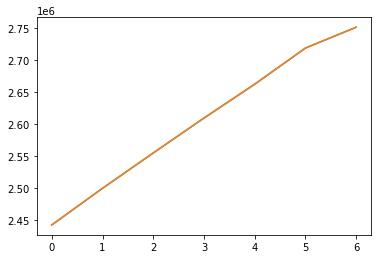

In [31]:
plt1 = plt.plot(y1)
plt2 = plt.plot(y2)

plt.show()

Well, this is a fairly uninformative plot. though it shows us that the Eurostat data and the OICA data match. I guess the useability of the data will increase once we get more data in it.

### Lets try to compare BEV's in Norway and in Sweden

In [ ]:
p_no_BEV= p_df[(p_df.geo==578) & (p_df.motor_energy=='BEV') & (p_df.vehicle_segment=='all')]
p_no_BEV

In [ ]:
p_se_BEV= p_df[(p_df.geo==752) & (p_df.motor_energy=='BEV') & (p_df.vehicle_segment=='all')]
p_se_BEV

In [ ]:
# gca stands for 'get current axis'
ax = plt.gca()

p_no_BEV.plot(kind='line',x='year_of_measurement',y='value',ax=ax)
p_se_BEV.plot(kind='line',x='year_of_measurement',y='value',ax=ax)

plt.show()


This is a bit more useful. I don't want to spend too much time on this as I'm not up on plotting in pandas. But the concept is there at least